# **Predictive Lead Scoring Using Web Research Signals**

## **Objective**
- X Education wants to create a best model that assigns a lead score between 0 and 100 to each lead, allowing the company to identify potential hot leads. A higher score indicates a higher probability of the lead converting, while a lower score suggests the lead is cold and less likely to convert. The lead score will enable the sales team to focus on the most promising leads, thus increasing the lead conversion rate.

- To build the model, X Education will use factors such as the lead's source, activity on the website, and communication history. By considering these factors, the model will predict the probability of the lead converting and assign a lead score accordingly. This lead score can then be used to prioritize follow-up communication efforts by the sales team, leading to a more efficient lead conversion process.

## **Problem Statement**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

**Dataset Link** - https://raw.githubusercontent.com/MalathiDataAnalyst/Lead-Scoring-Dataset/refs/heads/main/Lead_Scoring.csv

# **Stage 1**

## **Dataset Selection**

## **Source** / **Timeline** / **Location**

Kaggle / 2020 / Multiple Countries


## **Types of Problem**
Classification

## **Possible Algorithm Planned to use**

- Logistic Regression
- Random Forest Classification
- Decision Tree Classification
- Support Vector Machines(SVM)
- K- Nearest Neighbor (KNN)
- Gradient Boosting (XGBoost)

## **Dataset Description**

## **Feature Description**

- **Prospect ID** - A unique ID with which the customer is identified.
- **Lead Number** - A lead number assigned to each lead procured.
- **Lead Origin** - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- **Lead Source** - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- **Do Not Email** -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- **Do Not Call** - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- **Converted** - The target variable. Indicates whether a lead has been successfully converted or not.
- **TotalVisits** - The total number of visits made by the customer on the website.
- **Total Time Spent on Website** - The total time spent by the customer on the website.
- **Page Views Per Visit** - Average number of pages on the website viewed during the visits.
- **Last Activity** - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- **Country** - The country of the customer.
- **Specialization** - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- **How did you hear about X Education** - The source from which the customer heard about X Education.
- **What is your current occupation** - Indicates whether the customer is a student, umemployed or employed.
- **What matters most to you in choosing this course An option selected by the customer** - indicating what is their main motto behind doing this course.
- **Search** - Indicating whether the customer had seen the ad in any of the listed items(Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement).
- **Through Recommendations** - Indicates whether the customer came in through recommendations.
- **Receive More Updates About Our Courses** - Indicates whether the customer chose to receive more updates about the courses.
- **Tags** - Tags assigned to customers indicating the current status of the lead.
- **Lead Quality** - Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.
- **Update me on Supply Chain Content** - Indicates whether the customer wants updates on the Supply Chain Content.
- **Get updates on DM Content** - Indicates whether the customer wants updates on the DM Content.
- **Lead Profile** - A lead level assigned to each customer based on their profile.
- **City** - The city of the customer.
- **Asymmetric Activity Index** - An index and score assigned to each customer based on their activity and their profile (Asymmetric Profile Index,Asymmetric Activity Score,Asymmetric Profile Score).
- **I agree to pay the amount through cheque** - Indicates whether the customer has agreed to pay the amount through cheque or not.
- **A free copy of Mastering The Interview** - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- **Last Notable Activity** - The last notable activity performed by the student.

## **Sample Outcome**

**Target Features** - Converted

**Input Features** - Lead Origin, Lead Source, Do Not Email, Do Not Call, Total Visits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Specialization, How did you hear about X Education, What is your current occupation,City, Last Notable Activity.


## **Sample Output**

**Lead Origin, Lead Source, Do Not Email, Do Not Call, Total Visits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Specialization, How did you hear about X Education, What is your current occupation, City, Last Notable Activity** ---> **Converted**

## **Initial EDA**

- Read the data from Github - raw link

- Info

- Describe

- Null Values

- duplicates

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split     # To split dataset into training and testing
from sklearn.preprocessing import StandardScaler         # For scaling numerical features
from sklearn.feature_selection import RFE, RFECV         #Feature Selection Method
from sklearn.linear_model import LogisticRegression      # Logistic Regression
from sklearn.ensemble import RandomForestClassifier      # Random Forest
from sklearn.tree import DecisionTreeClassifier          # Decision Tree
from sklearn.svm import SVC                              # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier       # K-Nearest Neighbor
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV         # For hyperparameter tuning using cross-validation
from sklearn.model_selection import StratifiedKFold      # Cross-validation maintaining class balance


In [ ]:
# Storing the dataset link in df
df=pd.read_csv("https://raw.githubusercontent.com/MalathiDataAnalyst/Lead-Scoring-Dataset/refs/heads/main/Lead_Scoring.csv")
df.head() #shows first 5rows

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.shape # it shows no of rows and features(9240 rows and 37 features)

(9240, 37)

In [ ]:
print(df.info()) #it shows summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## **Description about Dataset**:
- In this dataset, totally 9240 rows with 37 columns.
- In that, 16 columns having missing values.
- Data types : object for category, int64 and float64 for numerical value with decimal.
- 7 numerical columns and 30 Categorical columns.

In [ ]:
df.describe() #it generate summary statistics for dataset

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## **Description about Statistics Summary**:
- Total count is 9240
- Total visit shows minimum 0 to maximum 251 visits
- Total time spent on website having minimum spent 0 to maximum spent 2272.
- Featurs like Total Visit, Total Time spent on Website,Page Views per Visit haaving some outlier. so, we have to treat and clean the datas.

In [ ]:
#view missing values
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [ ]:
df.duplicated().sum() # there is no duplicates

np.int64(0)

In [ ]:
df.columns #to list all columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip() #to remove extra spaces

# **Stage 2**

## **Data Cleaning**

## **Handling Missing Values**

In [ ]:
# Removing unnecesary columns for better prediction
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [ ]:
# Replacing 'Select' to 'Nan' because no category was selected
df['Specialization']= df['Specialization'].replace('Select',np.nan)
df['How did you hear about X Education']= df['How did you hear about X Education'].replace('Select',np.nan)
df['Lead Profile']= df['Lead Profile'].replace('Select',np.nan)
df['City']=df['City'].replace('Select',np.nan)

In [ ]:
#To find percentage null
round((df.isnull().sum()/df.shape[0]*100),2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


In [ ]:
#dropping the column more than 40% null values
df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                 'How did you hear about X Education','Lead Quality','Lead Profile',],inplace=True)

In [ ]:
# column having the unique value as 'no'
print(df['Get updates on DM Content'].value_counts())
print(df['I agree to pay the amount through cheque'].value_counts())
print(df['Receive More Updates About Our Courses'].value_counts())
print(df['Update me on Supply Chain Content'].value_counts())

Get updates on DM Content
No    9240
Name: count, dtype: int64
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64


In [ ]:
#Removing the column having unique values and not good for prediction
df.drop(columns=['Get updates on DM Content','I agree to pay the amount through cheque',
                 'Receive More Updates About Our Courses','Update me on Supply Chain Content'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#converting the null to percentage
round((df.isnull().sum()/df.shape[0])*100,2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


In [ ]:
# Replacing google with " Google"
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads','Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [ ]:
df['Lead Source'].value_counts().reset_index()

,Lead Source,count
0,Google,2873
1,Direct Traffic,2543
2,Olark Chat,1755
3,Organic Search,1154
4,Reference,534
5,Welingak Website,142
6,Referral Sites,125
7,Facebook,55
8,Others,23


In [ ]:
df['Lead Source']= df['Lead Source'].fillna(df['Lead Source'].mode()[0])

In [ ]:
df['Last Activity'].value_counts().reset_index()

,Last Activity,count
0,Email Opened,3437
1,SMS Sent,2745
2,Olark Chat Conversation,973
3,Page Visited on Website,640
4,Converted to Lead,428
5,Email Bounced,326
6,Email Link Clicked,267
7,Form Submitted on Website,116
8,Unreachable,93
9,Unsubscribed,61


In [ ]:
# Creating a new category 'Others' for some of the Last Activity which do not have much values.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [ ]:
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [ ]:
df['Specialization'].value_counts().reset_index()

,Specialization,count
0,Finance Management,976
1,Human Resource Management,848
2,Marketing Management,838
3,Operations Management,503
4,Business Administration,403
5,IT Projects Management,366
6,Supply Chain Management,349
7,"Banking, Investment And Insurance",338
8,Media and Advertising,203
9,Travel and Tourism,203


In [ ]:
df['Specialization']=df['Specialization'].replace(np.nan,'Others')

In [ ]:
df['What is your current occupation'].value_counts().reset_index()

,What is your current occupation,count
0,Unemployed,5600
1,Working Professional,706
2,Student,210
3,Other,16
4,Housewife,10
5,Businessman,8


In [ ]:
df['What is your current occupation']=df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0])

In [ ]:
df['What matters most to you in choosing a course'].value_counts().reset_index()

,What matters most to you in choosing a course,count
0,Better Career Prospects,6528
1,Flexibility & Convenience,2
2,Other,1


In [ ]:
#Almost all the column belongs to ('Better Career Prospects') so, we can drop this column
df.drop(columns='What matters most to you in choosing a course',axis=1,inplace=True)

In [ ]:
df['City'].value_counts().reset_index()

,City,count
0,Mumbai,3222
1,Thane & Outskirts,752
2,Other Cities,686
3,Other Cities of Maharashtra,457
4,Other Metro Cities,380
5,Tier II Cities,74


In [ ]:
df['City']=df['City'].replace(np.nan,'Mumbai')

In [ ]:
df['Country'].value_counts().reset_index()

,Country,count
0,India,6492
1,United States,69
2,United Arab Emirates,53
3,Singapore,24
4,Saudi Arabia,21
5,United Kingdom,15
6,Australia,13
7,Qatar,10
8,Hong Kong,7
9,Bahrain,7


In [ ]:
df['Country']=df['Country'].replace(np.nan,'India')

In [ ]:
df['Tags'].value_counts().reset_index()

,Tags,count
0,Will revert after reading the email,2072
1,Ringing,1203
2,Interested in other courses,513
3,Already a student,465
4,Closed by Horizzon,358
5,switched off,240
6,Busy,186
7,Lost to EINS,175
8,Not doing further education,145
9,Interested in full time MBA,117


In [ ]:
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [ ]:
df['TotalVisits'].isnull().mean() * 100 #Value having <5 so we can impute Median

np.float64(1.4826839826839828)

In [ ]:
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())

In [ ]:
df['Page Views Per Visit'].isnull().mean() *100 #Value having <5 so we can impute Median

np.float64(1.4826839826839828)

In [ ]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [ ]:
#checking the null values
(df.isnull().sum()/df.shape[0])*100

,0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Country,0.0


### **Description about filling Null Values**
- **Categorial Column** (Lead Source, Last Activity, Specialization, What is your current occupation, City) have imputed Mode for Null values.
- **Numberical Column** (Total Visit, Pages Views per Visit) have imputed Median for Null values

In [ ]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
columns=[['Search','Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']]
for col in columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")

Value counts for column: ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
Search  Magazine  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  Through Recommendations  A free copy of Mastering The Interview
No      No        No                 No                  No         No                     No                       No                                        6335
                                                                                                                    Yes                                       2882
Yes     No        No                 No                  No         No                     No                       No                                           9
No      No        No                 No                  No         Yes                    No                       No                                        

In [ ]:
#Dropping the columns for better prediction
df.drop(columns=['Country','Tags','Search','Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],axis=1,inplace=True)

### **Description about dropping features**
- To predict model accuracy, need to drop the columns having more than 40% null values --> How did you hear about X Education, Lead Profile, Lead Quality, Asymmetrique Profile Score, Asymmetrique Activity Score,Asymmetrique Profile Index, Asymmetrique Activity Index.
- Removing the redundant columns(Columns having only Unique values) --> Receive More Updates About Our Courses,Update me on Supply Chain Content, Get updates on DM Content,I agree to pay the amount through cheque.
- Removing unwanted column for prediction :
- What matters most to you in choosing a course - Column having only one response.
- Country - Number of values for India is quite high(97%) so,need to remove that column,
- Tags - Since this column is generated by the sales team for their analysis, it is not available for model building. Therefore, we need to remove this column before building the model.
- Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview - Column having Highest Unique value as No. We need to remove this column for better prediction.

## **Handling Duplicates Values**

In [ ]:
#Before handling duplicates
df.shape

(9240, 13)

In [ ]:
df.duplicated().sum() # Checking duplicates

np.int64(1823)

In [ ]:
df.drop_duplicates(keep='first',inplace=True) #dropping duplicates

In [ ]:
df.shape

(7417, 13)

### **Intrepretation for Handling Duplicates**
- Before handling missing values --> There is no duplicate rows in this dataset.
- After handling the missing values --> Some rows become identical and resulted in 1823 duplicate rows.
- So, we have to drop the duplicates by keeping the first occurrence.
- Before Duplicate Removal --> 9240 rows × 13 columns
- After Duplicate Removal  --> 7417 rows × 13 columns

## **Handling Outlier and Skewness**

In [ ]:
df.shape

(7417, 13)

## **Distribution of Lead Scoring using Box Plot**

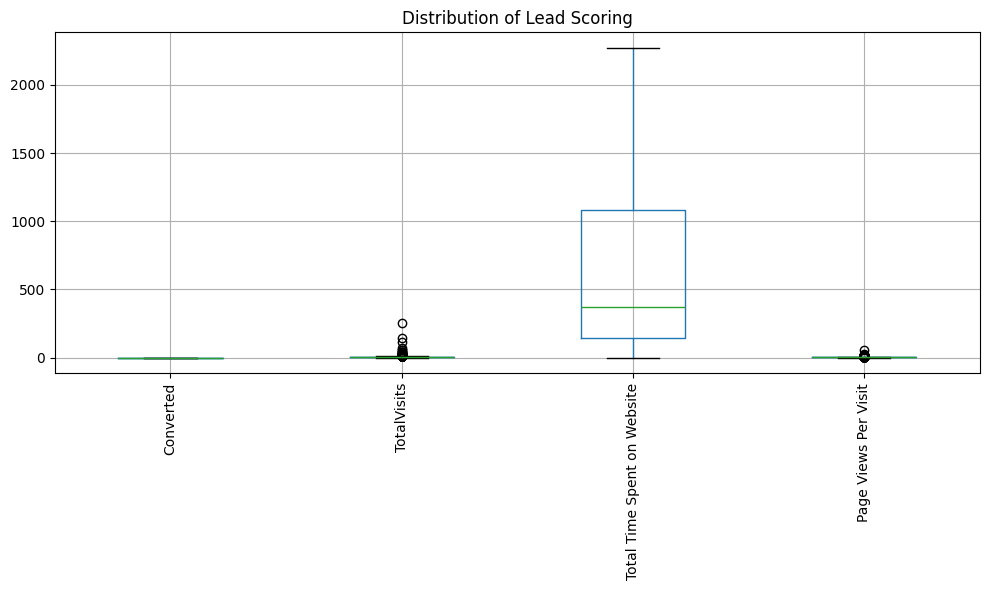

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Distribution of Lead Scoring')
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Lead Scoring using Box Plot**
- There is an Outlier in 'TotalVisits' and 'Page views per visit' columns need to work on it by using the IQR Method.

In [ ]:
columns = ['TotalVisits','Page Views Per Visit']
#handling Outlier
for col in columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR = q3-q1
  lower_bound = q1-1.5*IQR
  upper_bound = q3+1.5*IQR
  df= df[(df[col]>=lower_bound) & (df[col]<=upper_bound)] #keeping the rows within the


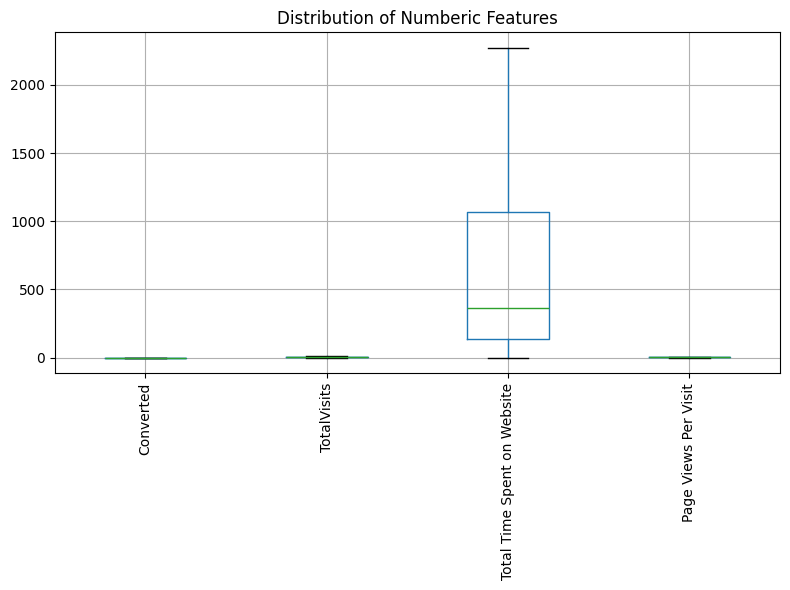

In [ ]:
#Using Boxplot to view the outlier
plt.figure(figsize=(8,6))
df.boxplot()
plt.title('Distribution of Numberic Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(6822, 13)

In [ ]:
7417-6822 #595 outlier were removed

595

## **Checking Skewness using Kde plot**

In [ ]:
#checking Skewness
print("Total Visit Skewness:",df['TotalVisits'].skew())
print("Total Time Spent on Website:",df['Total Time Spent on Website'].skew())
print("Page Views per Visit:",df['Page Views Per Visit'].skew())

Total Visit Skewness: 0.5940988456401101
Total Time Spent on Website: 0.7171259473394989
Page Views per Visit: 0.6372089009015549


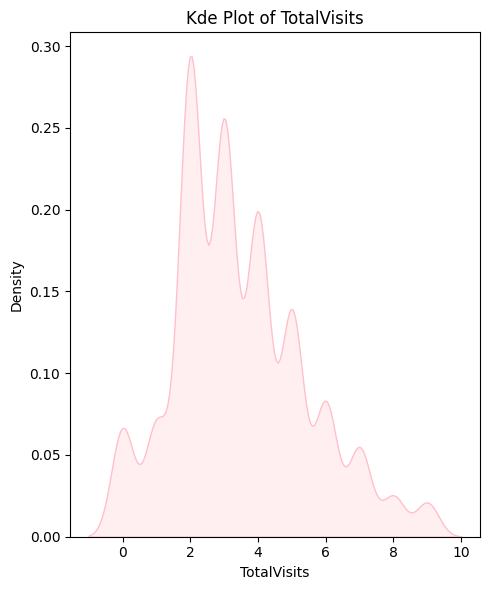

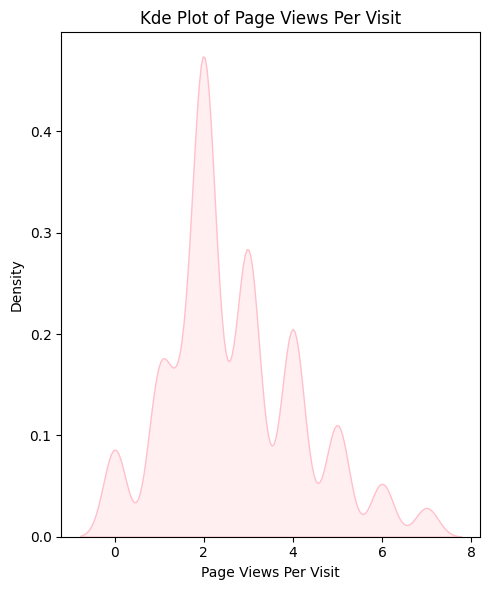

In [ ]:
for col in columns:
  plt.figure(figsize=(5,6))
  sns.kdeplot(df[col],color='Pink',fill=True)
  plt.title(f'Kde Plot of {col}')
  plt.tight_layout()
  plt.show()

### **Interpretation for Skewed Datas**
- After using the IQR Method, outlier were removed.
- Skewness for the Total Visit --> 0.59, its almost positively Skewed.
- Skewness for the Total Time Spent on Website --> 0.71, it is also moderate positively skewed.
- Skewness for the Page Views per Visit --> 0.63, it is also moderate positively skewed.
- There is no need for transformation.
- 595 outlier were removed.

## **Exploratory Data Analysis**

## **Distribution of Lead Origin and Converted using Count Plot**

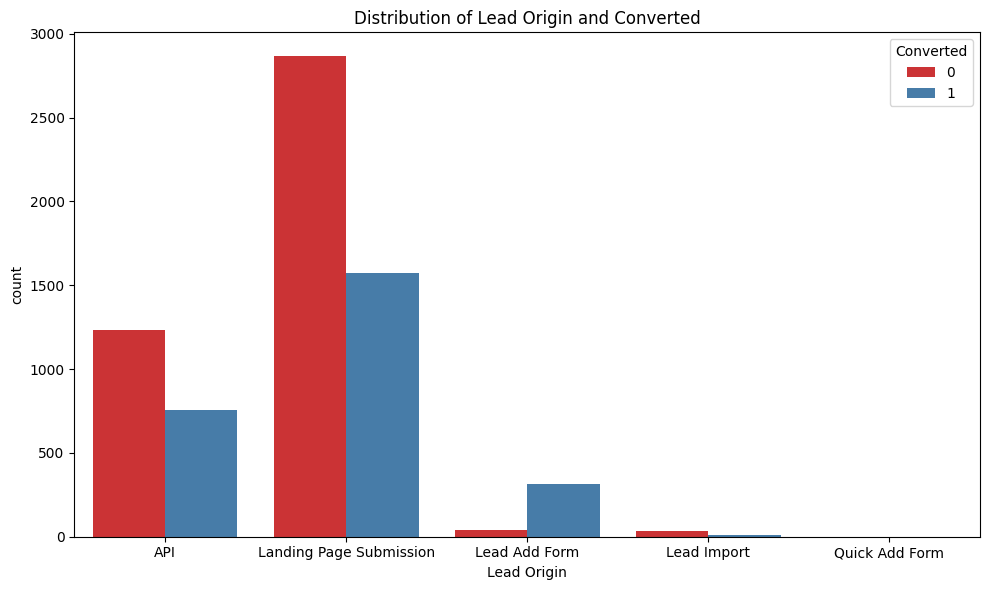

In [ ]:
#Univarient
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Lead Origin',hue='Converted',palette='Set1')
plt.title("Distribution of Lead Origin and Converted")
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Lead Origin and Converted using Count Plot**:
- Count of Landing page Submission has highest range of 2700.
- API also performs the average lead origin.
- Lead import has lowest count and low conversion rate.

## **Distribution of Lead Source and Converted using Count Plot**

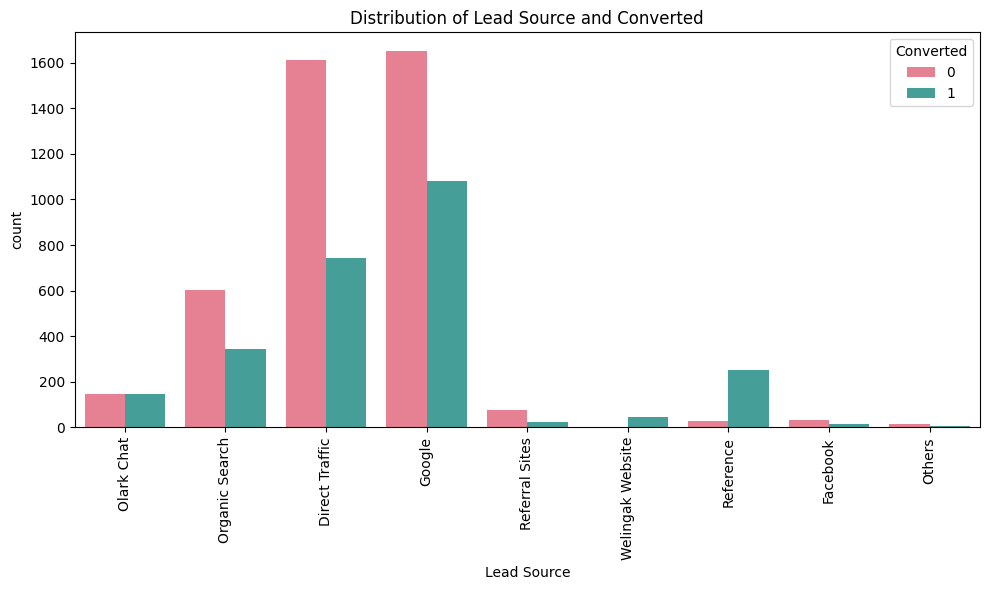

In [ ]:
#Univarient
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Lead Source',hue='Converted',palette='husl')
plt.title("Distribution of Lead Source and Converted")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Lead Source and Converted using Count Plot**:
- Google has the highest lead source upto 1700 compared to others.
- Direct traffic also performed well upto 1600.
- Organic Search has gives the average performance.
- 'Bing', 'Social Media','WeLearn', 'Live Chat', 'welearnblog_Home', 'youtubechannel','Click2call', 'testone', 'Press_Release', 'NC_EDM' has lowest performance.
- We need to perform the lead generation to improve the lead conversion rate.



## **Distribution of Do Not Email and Converted using Count Plot**

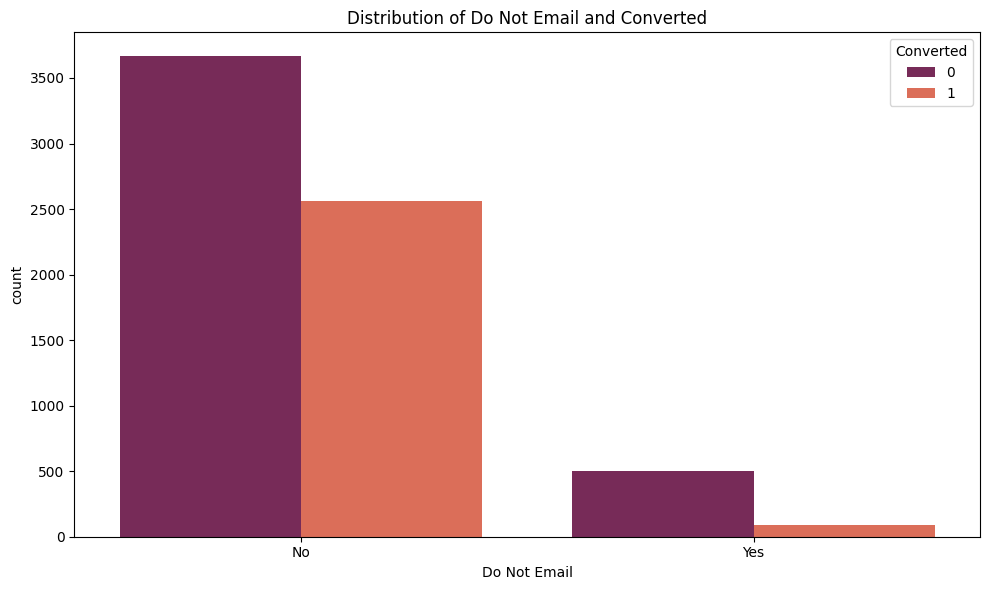

In [ ]:
#Univarient
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Do Not Email',hue='Converted',palette='rocket')
plt.title("Distribution of Do Not Email and Converted")
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Do Not Email and Converted using Count Plot**
- Yes --> They do not want email, No -->They want email
- Most of the leads wants the Email.
- Conversion rate for people who do not want the email is lesser than who want the email.

## **Distribution of Do Not Call and Converted using Count plot.**

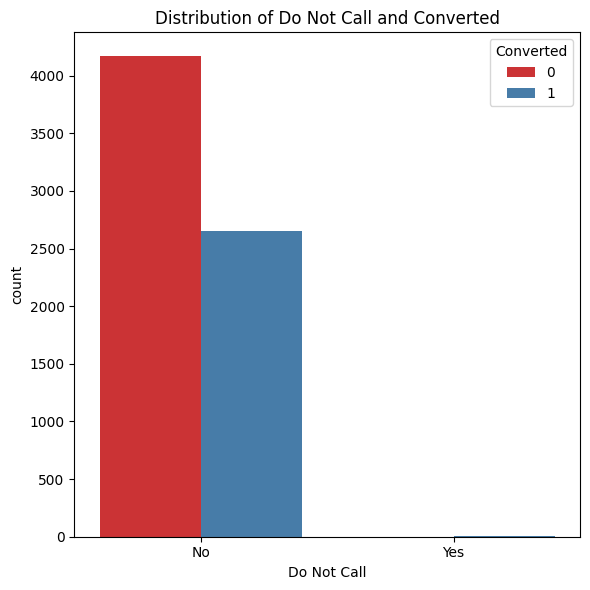

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Do Not Call',hue='Converted',palette='Set1')
plt.title("Distribution of Do Not Call and Converted")
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Do Not Call and Converted using Count plot**
- No --> Customer allows call, Yes --> Customer dont want the calls
- All the people is okay with calling to update the course details
- Many did not converted --> above 4000
- Significant number has converted --> 2600

## **Relationship between Total Visit and Total Time Spent on Website using Scatter Plot**

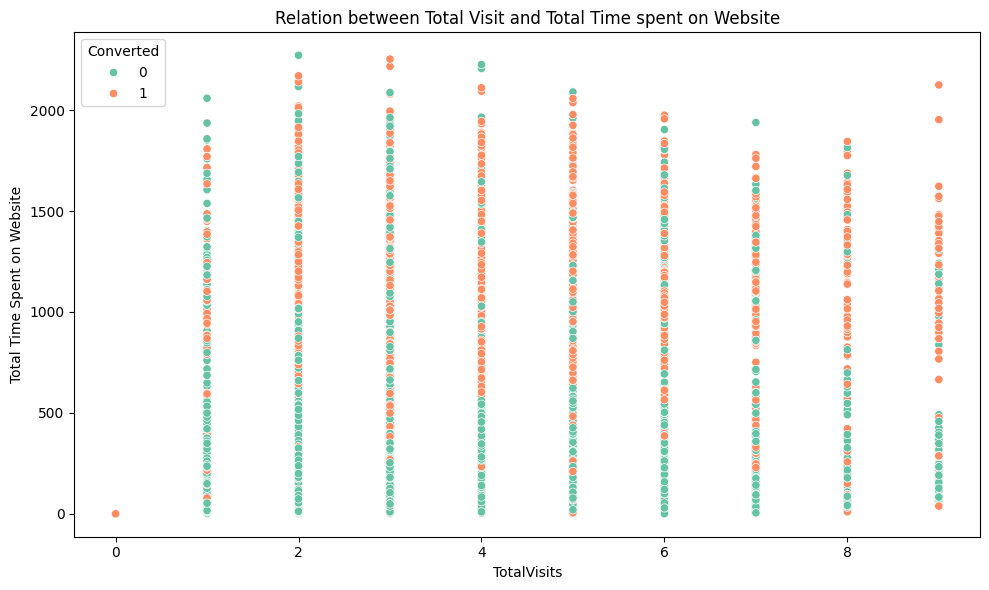

In [ ]:
#Bivarient
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='TotalVisits',y='Total Time Spent on Website',hue='Converted',palette='Set2')
plt.title("Relation between Total Visit and Total Time spent on Website")
plt.tight_layout()
plt.show()

### **Interpretation for Total Visit and Total Time Spent on Website using Scatter Plot**
- Higher time spent on website has highly correlates with conversion rates.
- There is weak conversion rate for Total visit.

## **Distribution of Page Views per Visit and Converted.**

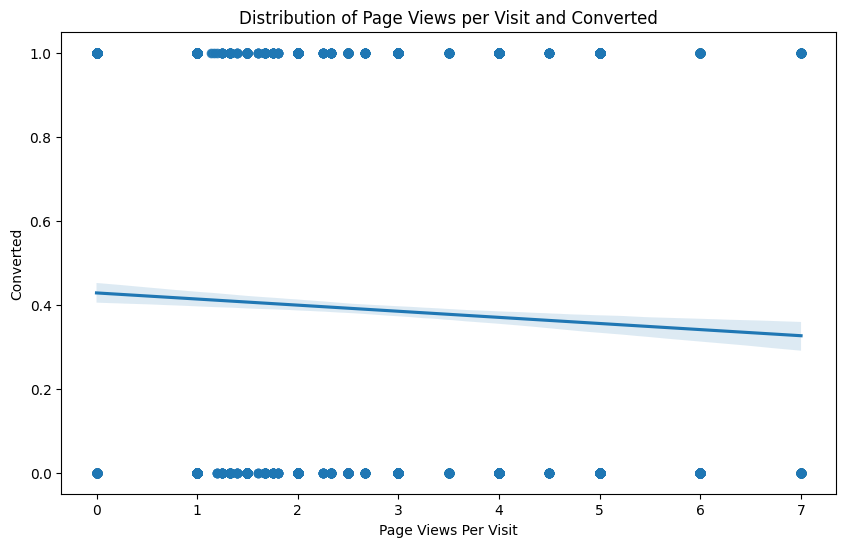

In [ ]:
#Bivarient
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Page Views Per Visit',y='Converted')
sns.regplot(data=df,x='Page Views Per Visit',y='Converted') #regplot is for adding trendline
plt.title("Distribution of Page Views per Visit and Converted")
plt.show()

### **Interpretation for Distribution of Page Views per Visit and Converted**
- Most leads fall between 0 to 7 page views.
- When Page view per visit increases gradually the conversion rates also increasing at the beginning, after some threshold gives diminishing returns.
- The regression line is flat, it indicates negatively correlated with conversion rates.

## **Distribution of Specialization and Converted using Bar Plot.**

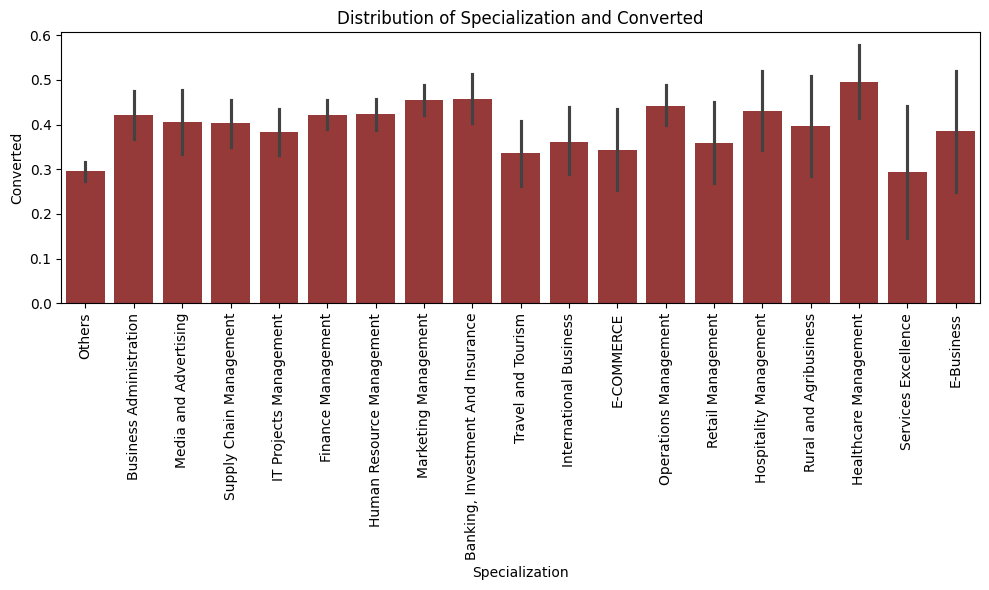

In [ ]:
#Bivarient
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Specialization',y='Converted',color='brown')
plt.title('Distribution of Specialization and Converted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Specialization and Converted using Bar Plot.**
- All the conversion rates are high above 0.3 expect others to 0.5.
- Healthcare Management has highest conversion rates.
- Banking,Investment,Marketing,Operation Management has also gives average conversion rates.
- Others performed very low compared to others in specialization.

8. **Distribution of City and Converted using Count Plot.**

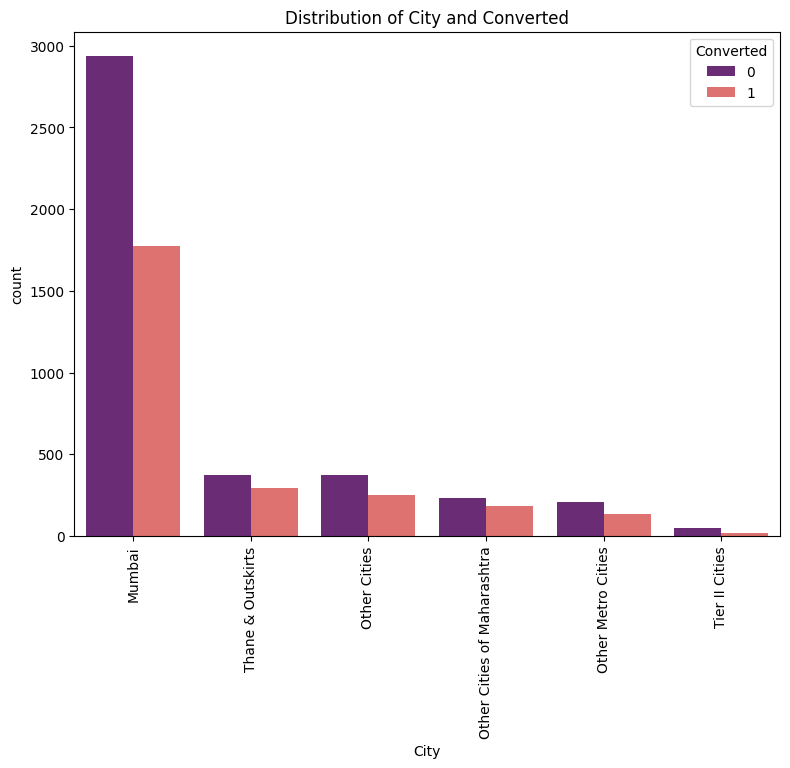

In [ ]:
#Bivarient
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='City',hue='Converted',palette='magma')
plt.title("Distribution of City and Converted")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### **Interpretation for Distribution of City and Converted using Count Plot**
- Not Converted customer is higher than Converted customers.
- Mumbai has highest conversion rates compared to others.
- Tier || cities has lowerest conversion rate.
- All the cities have below 500 conversion rate except mumbai.

In [ ]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
numerical_col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

## **Distribution of Numerical Features using Heat Map**

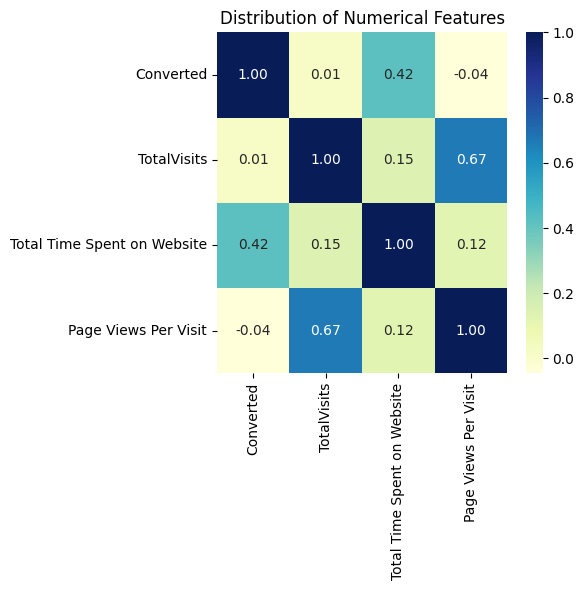

In [ ]:
#Multivarient
plt.figure(figsize=(6,6))
sns.heatmap(df[numerical_col].corr(),annot=True,fmt='.2f',cmap='YlGnBu')
plt.title("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Numerical Features using Heat Map**
- Total time spent on website and converted has moderate correlation(0.42).
- Total visit and Page views per visit has strong correlation (0.67).
- Page views per visit and converted has negative correlation(-0.04)
- Total Visit and Total time spent on website have weak positive correlation (0.15).
- Page views per visit and Total time spent on website have weak correlation (0.12).
- There is no linear relation between Converted and Total visit.

## **Distribution of Last Activity Vs Converted using Count Plot.**

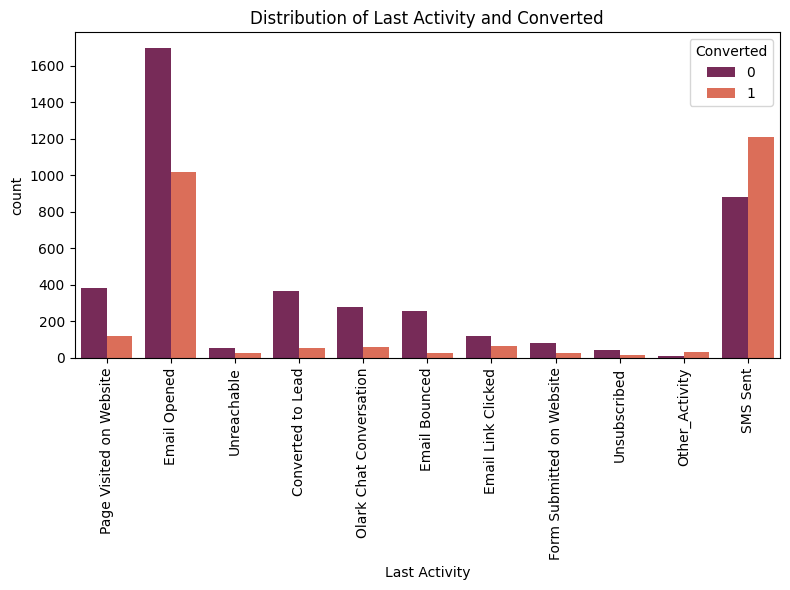

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Last Activity',hue='Converted',palette='rocket')
plt.title("Distribution of Last Activity and Converted")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Intrepretation for Distribution of Last Activity and Converted using Count Plot**
- Email Opened and SMS Sent most common last activity before conversion.
- Visited Booth in Tradeshow,Approached upfront,Resubscribed to emails,Email Received,Email Marked Spam has less conversion rates.
- Page Visited on Website,Converted to Lead,Olark Chat Conversation,Email Bounced,Email Link Clicked has moderate conversion rates.

## **Distribution of Occupation and Converted using Count Plot.**

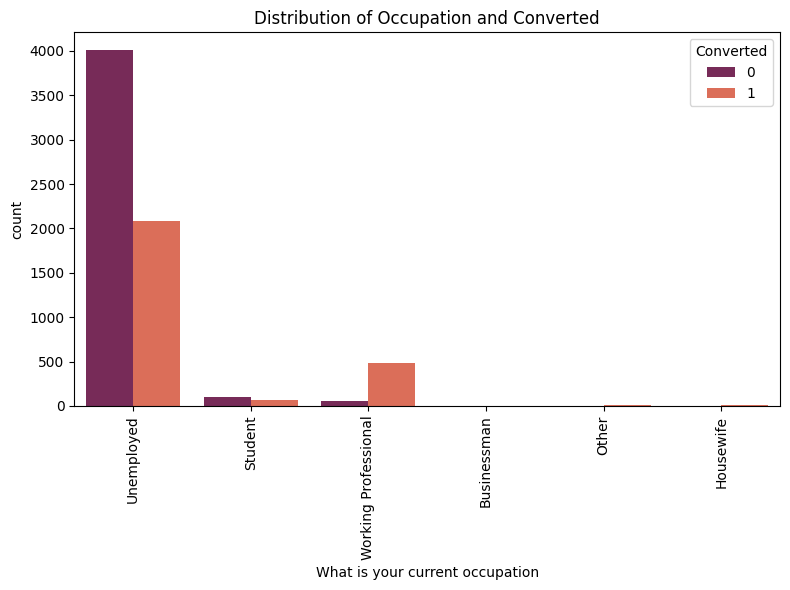

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='What is your current occupation',hue='Converted',palette='rocket')
plt.title("Distribution of Occupation and Converted")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Interpretation for Distribution of Occupation and Converted using Count Plot**
- Most responses from Unemployed people highest conversion rate.
- Working Proffesional,Student and Businessman has moderate conversion rate with low counts.

### **Distribution of Convented using Pie chart**

<Axes: ylabel='count'>

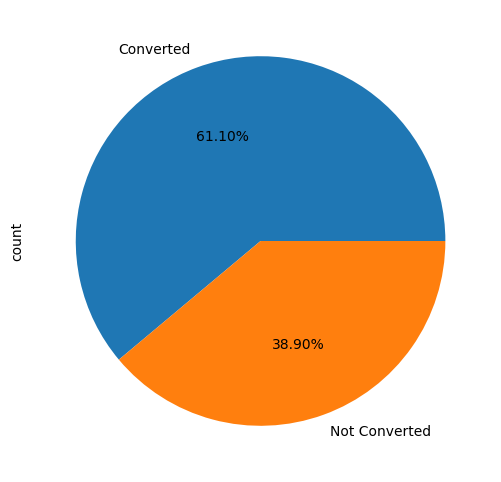

In [ ]:
df['Converted'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f%%',labels=['Converted','Not Converted'])

### **Interpretation for Converted using Pie Chart**
- Most of the leads are Converted (61%).
- 38% lead are not Converted.

In [ ]:
categoriacl_col=df.select_dtypes(include='O').columns
categoriacl_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'Last Notable Activity'],
      dtype='object')

In [ ]:
df['Last Notable Activity'].value_counts().reset_index()

,Last Notable Activity,count
0,Modified,2481
1,Email Opened,2161
2,SMS Sent,1625
3,Page Visited on Website,225
4,Email Link Clicked,114
5,Olark Chat Conversation,75
6,Email Bounced,53
7,Unsubscribed,43
8,Unreachable,28
9,Had a Phone Conversation,10


In [ ]:
x = ['Email Received', 'Response B','Form Submitted on Website','View in browser link Clicked','Resubscribed to emails','Approached upfront','Email Marked Spam','Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced','Email Link Clicked','Olark Chat Conversation','Olark Chat Conversation','Page Visited on Website']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(x, 'Other')

In [ ]:
df['Last Notable Activity'].value_counts().reset_index()

,Last Notable Activity,count
0,Modified,2481
1,Email Opened,2161
2,SMS Sent,1625
3,Other,555


In [ ]:
## Checking the lead conversion Rate
sum(df['Converted'])/len(df['Converted'].index)*100

38.90354734681912

Currently, we have 38% of Lead Conversion Rate.

# **Stage 3**

## **Feature Engineering**

In [ ]:
#Generating Binary column to Numberic values
df['Do Not Call']=df['Do Not Call'].map({'Yes':1,'No':0})
df['Do Not Email']=df['Do Not Email'].map({'Yes':1,'No':0})

In [ ]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Encoding the Categorical Variable to Numerical Values
dump_var=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                          'What is your current occupation','City','Last Notable Activity']],drop_first=True).astype(int)
dump_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
dump_var.shape

(6822, 53)

In [ ]:
#Adding the the dummy variables in dataframe
df=pd.concat([df,dump_var],axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,1,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,1,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(6822, 66)

In [ ]:
#Dropping the columns for which Dummy variable were made
df=df.drop(['Lead Source','Lead Origin','Last Activity','Specialization','What is your current occupation',
       'City', 'Last Notable Activity'],axis=1)

In [ ]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(6822, 59)

## **Feature Selection**

In [ ]:
#selecting Input Feature and Target Variable
X= df.drop(columns='Converted',axis=1)
y= df['Converted']

In [ ]:
X.shape

(6822, 58)

In [ ]:
y.shape

(6822,)

## **Splitting the Dataset for Training and Testing parts using Train Test Split.**

In [ ]:
#Spliting the dataset for Training and Testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(4775, 58)

In [ ]:
X_test.shape

(2047, 58)

In [ ]:
y_test.shape

(2047,)

## **Feature Scaling**

In [ ]:
#Scaling the numberical features
col =['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
X_train[col]= scaler.fit_transform(X_train[col])
X_test[col]= scaler.transform(X_test[col])

## **Model Building**

## **Feature Selection by Recursive Feature Elimination with Cross-Validation**

In [ ]:
#Feature selection by RFECV

# Initialize Logistic Regression
log = LogisticRegression(max_iter=1000, random_state=42)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv =RFECV(estimator=log,cv=cv,scoring='f1') #rfe important technique to main feature for prediction
rfecv.fit(X_train,y_train)

print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", X_train.columns[rfecv.support_])

Optimal number of features: 20
Selected features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [ ]:
selected_features=X_train.columns[rfecv.support_]

# Reduce training and test sets to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:\n", selected_features)
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

Selected Features:
 Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')
X_train_selected shape: (4775, 20)
X_test_selected shape: (2047, 20)


## **Model Building Comparison**

In [ ]:
models = {
    'Logistic':LogisticRegression(max_iter=1000,random_state=42),
    'Random_Forest':RandomForestClassifier(random_state=42),
    'Decision_Tree':DecisionTreeClassifier(random_state=42),
    'xgb_model':XGBClassifier(random_state=42,eval_metric='logloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
result =[]

for name,clf in models.items():
  # fit on selected features
  clf.fit(X_train_selected,y_train)
  y_pred=clf.predict(X_test_selected)

  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)

  result.append ({
      'Model':name,
      'Accuracy':acc,
      'F1_Score':f1,
      'Precision Score':precision,
      'Recall score':recall
  })

# Convert to DataFrame and sort by F1 score
result_df=pd.DataFrame(result)
result_df=result_df.sort_values(by='F1_Score',ascending=False)
print(result_df)


           Model  Accuracy  F1_Score  Precision Score  Recall score
4            SVM  0.806546  0.729138         0.774709      0.688630
3      xgb_model  0.795310  0.721595         0.742818      0.701550
0       Logistic  0.790914  0.702778         0.759760      0.653747
5            KNN  0.780655  0.697643         0.728551      0.669251
1  Random_Forest  0.758183  0.672835         0.688769      0.657623
2  Decision_Tree  0.752809  0.662667         0.684573      0.642119


# **Stage 4**

## **Hypertuning using GridSearchCV**


In [ ]:
#Hypertuning XGBoost using GridSearchCv
xgb_param={'max_depth':[5,6,8,7],'learning_rate':[0.1,0.75,1],'n_estimators':[75,100,150]}
xgb_grid = GridSearchCV(estimator=models['xgb_model'],param_grid=xgb_param,cv=3)
xgb_grid.fit(X_train_selected,y_train)
print('Best Parameter',xgb_grid.best_params_)
print('Best Score',xgb_grid.best_score_)
y_pred=xgb_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Best Parameter {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}
Best Score 0.8104714068983089
Accuracy Score 0.8070346849047386
F1 Score 0.7392739273927392


In [ ]:
#Hypertuning Logistic Regression using GridSearchCv
from sklearn.model_selection import GridSearchCV
log_param={'C':[1,1.5,2,2.5],'solver':['lbfgs']}
log_grid = GridSearchCV(estimator=models['Logistic'],param_grid=log_param,cv=3)
log_grid.fit(X_train_selected,y_train)
print('Best Parameter',log_grid.best_params_)
print('Best Score',log_grid.best_score_)
y_pred=log_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Best Parameter {'C': 1, 'solver': 'lbfgs'}
Best Score 0.8018832640049188
Accuracy Score 0.7909135319980459
F1 Score 0.7027777777777777


In [ ]:
#Hypertuning K Nearest Neighbor using GridSearchCv
from sklearn.model_selection import GridSearchCV
knn_param={'n_neighbors':[5,6,8],'weights':['uniform','distance']}
knn_grid = GridSearchCV(estimator=models['KNN'],param_grid=knn_param,cv=3)
knn_grid.fit(X_train_selected,y_train)
print('Best Parameter',knn_grid.best_params_)
print('Best Score',knn_grid.best_score_)
y_pred=knn_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Best Parameter {'n_neighbors': 8, 'weights': 'uniform'}
Best Score 0.7947657836637619
Accuracy Score 0.7997068881289692
F1 Score 0.7108603667136812


In [ ]:
#Hypertuning Decision Tree using GridSearchCv
from sklearn.model_selection import GridSearchCV
d_param={'max_depth':[6,8,9],'min_samples_split':[5,6,8]}
df_grid = GridSearchCV(estimator=models['Decision_Tree'],param_grid=d_param,cv=3)
df_grid.fit(X_train_selected,y_train)
print('Best Parameter',df_grid.best_params_)
print('Best Score',df_grid.best_score_)
y_pred=df_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))


Best Parameter {'max_depth': 6, 'min_samples_split': 6}
Best Score 0.8018847116369612
Accuracy Score 0.8001954079140206
F1 Score 0.7325049051667757


In [ ]:
#Hypertuning Support Vector Classifier using GridSearchCv
from sklearn.model_selection import GridSearchCV
svc_param={'C':[1,1.5,2,2.5],'kernel':['linear','rbf']}
svc_grid = GridSearchCV(estimator=models['SVM'],param_grid=svc_param,cv=3)
svc_grid.fit(X_train_selected,y_train)
print('Best Parameter',svc_grid.best_params_)
print('Best Score',svc_grid.best_score_)
y_pred=svc_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Best Parameter {'C': 2.5, 'kernel': 'rbf'}
Best Score 0.8117272934966051
Accuracy Score 0.8055691255495847
F1 Score 0.728882833787466


In [ ]:
#Hypertuning Random Forest Tree using GridSearchCv
from sklearn.model_selection import GridSearchCV
randam_param={'n_estimators':[75,100,150],'max_depth':[6,8,9]}
rf_grid = GridSearchCV(estimator=models['Random_Forest'],param_grid=randam_param,cv=3)
rf_grid.fit(X_train_selected,y_train)
print('Best Parameter',rf_grid.best_params_)
print('Best Score',rf_grid.best_score_)
y_pred=rf_grid.predict(X_test_selected)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))


Best Parameter {'max_depth': 9, 'n_estimators': 100}
Best Score 0.8131928235352333
Accuracy Score 0.8021494870542257
F1 Score 0.7246770904146839


### **Interpretation about Hyperparameter tuning using GridSearchCV**

- In XGBoost--> Best score is 81% and F1 score is 73% when max_depth is 5 and n_estimator is 75.
- In K-Nearest Neighbor --> Best score is 79% and F1 score is 71% when n-neighbor is 8 and weights is Uniform.
- In Logistic Regression --> Best score is 80% and F1 score is 70% when C(inverse od regularization strengh) is 1 and Solver(algorithm) is lbfgs(quasi-Newton method).
- In Decision Tree -->  Best score is 80% and F1 score is 73 % when max_depth is 6 and min_sample_split is 6.
- In Support Vector Machine --> Best score is 81% and F1 score is 72% when C(inverse od regularization strengh) is 2.5 and kernel is rbf(Radial basis function).
- In Random Forest Tree --> Best score is 81% and F1 score is 72 % when max_depth is 9 and n_estimator is 100.
- Finally Random Forest and SVM having highest best score.

## **Comparing the model by ROC Curve**

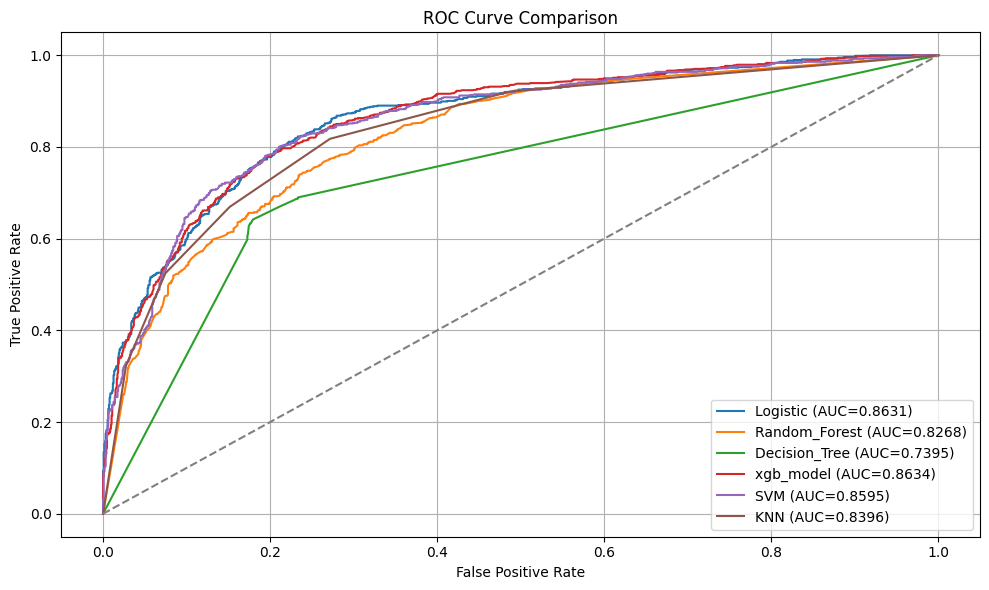

In [ ]:
plt.figure(figsize=(10,6))

for name, clf in models.items():
    # Fit the model on selected features if not already fitted
    if not hasattr(clf, "classes_"):
        clf.fit(X_train_selected, y_train)

    # Get predicted probabilities or decision function
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test_selected)[:, 1]
    else:
        y_prob = clf.decision_function(X_test_selected)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})')

plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost for balanced F1 and accuracy (robust).SVM also performs similarly.

## **Precision Recall Curve for Xgboost**

In [ ]:
#tuning XGB
y_prob = xgb_grid.predict_proba(X_test_selected)[:,1]

precision,recall,threshold =precision_recall_curve(y_test,y_prob)

#for best threshold
f1= 2 * (precision*recall) / (precision+recall)

# -1 ignoring last precision/recall point
best_index= np.argmax(f1[:-1])

#index of the threshold gives highest F1 Score
best_thresh= threshold[best_index]

print('Best Threshold',best_thresh)
print('Best Precision',precision[best_index])
print('Best Recall',recall[best_index])
print('Best F1 Score',f1[best_index])

Best Threshold 0.3798643
Best Precision 0.7199074074074074
Best Recall 0.8036175710594315
Best F1 Score 0.7594627594627595


### **Interpretation for Precision Recall Curve**
- ROC curve --> plots True Postive Rates and False Positive Rates. Data can be imbalanced because 30% datas only converted,So, ROC still may hide more poor performance on minority class. So, we have to use Presicion and Recall Curve.
- Precision --> How many actually converted?
- Recall --> In all actually converted leads,how many we will catch?
- Main goal is to catch the many Hot Leads (High Recall catchs more leads,risk more false positive)
- To avoid the Cold Leads, we have maintain some Precision(High precision,fewer false positive, but misses some real leads).
- Threshold =0.38, Predicted_probability >= 0.38 --> Converted
- Threshold =0.38, Predicted_probability <  0.38 --> Not Converted
- Precision --> 72% actually converted(Sales team effort is focused on quality leads.)
- Recall --> All the converting leads, the model correctly identifies 80% as Hot(Good coverage—you’re catching most potential customers.)
- F1 Score --> 76% → Good balance between quality (precision) and coverage (recall).

## **Model Evaluation**

In [ ]:
#converting the probability to lead score
lead_score = y_prob*100
#creating the dataframe for lead score
df_leads = X_test_selected.copy()
df_leads['Converted']=y_test.values
df_leads['Converted_prob']= y_prob
df_leads['Lead_Score']= lead_score #lead score 0 to 100
threshold_value = 0.38
df_leads['Predicted_Final_leads']= (df_leads['Converted_prob']>=threshold_value).astype(int)
hot_leads=df_leads[df_leads['Predicted_Final_leads']==True].copy()
# 0-30 - Cold, 31-37-Warm, 38-100 Hot
df_leads['Lead_Category']=pd.cut(df_leads['Lead_Score'],bins=[0,30,37,100],labels=['Cold','Warm','Hot'])
df_leads_sorted=df_leads.sort_values(by='Lead_Score',ascending=False)
df_leads_sorted.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unreachable,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,Last Notable Activity_Other,Last Notable Activity_SMS Sent,Converted,Converted_prob,Lead_Score,Predicted_Final_leads,Lead_Category
7171,0,0.475703,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0.992943,99.294258,1,Hot
4187,0,0.286514,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0.991264,99.126366,1,Hot
1263,0,0.450235,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0.991264,99.126366,1,Hot
2938,0,0.903196,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0.990504,99.050400,1,Hot
2852,0,0.848623,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0.990504,99.050400,1,Hot


In [ ]:
conversion_rates=df_leads.groupby('Lead_Category')['Converted'].mean()*100
conversion_rates

/tmp/ipython-input-1366137056.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rates=df_leads.groupby('Lead_Category')['Converted'].mean()*100


,Converted
Lead_Category,
Cold,10.188679
Warm,37.288136
Hot,71.576525


Hot Leads have highest lead segment.

In [ ]:
#reseting the index for y_test and Hot leads
y_pred_thresh = df_leads['Predicted_Final_leads'].reset_index(drop=True)
y_true =y_test.reset_index(drop=True)
print('Accuracy Score',accuracy_score(y_true,y_pred_thresh))
print('F1 Score',f1_score(y_true,y_pred_thresh))
print('Precision Score',precision_score(y_true,y_pred_thresh))
print('Recall Score',recall_score(y_true,y_pred_thresh))


Accuracy Score 0.8070346849047386
F1 Score 0.7587049480757483
Precision Score 0.7195828505214369
Recall Score 0.8023255813953488


## **Confusion Matrix for Testing Data**

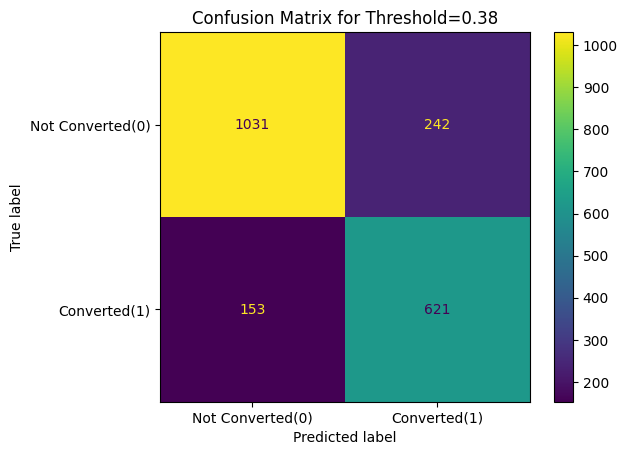

In [ ]:
disp=ConfusionMatrixDisplay.from_predictions(y_true,y_pred_thresh,display_labels=['Not Converted(0)','Converted(1)'])
plt.title("Confusion Matrix for Threshold=0.38")
plt.show()

### **Interpretation for Confusion Matrix(Testing Data)**
- True Negatives --> 1031 correctly predicted Non Converted leads.
- True Positive --> 621 correctly predicted as Converted leads.
- False Positive --> 242 correctly predicted(hot leads) but Not Converted.
- False Negative--> 153 Missed Hot leads thats actually Converted.
- Totally 395 errors only.There is an balance between Precision and Recall.

In [ ]:
#Creating Dataframe for final lead scoring output
df_final=pd.DataFrame(df_leads_sorted[['Converted','Converted_prob','Lead_Score','Lead_Category','Predicted_Final_leads']])
df_final.head()

,Converted,Converted_prob,Lead_Score,Lead_Category,Predicted_Final_leads
7171,1,0.992943,99.294258,Hot,1
4187,1,0.991264,99.126366,Hot,1
1263,1,0.991264,99.126366,Hot,1
2938,1,0.990504,99.050400,Hot,1
2852,1,0.990504,99.050400,Hot,1


### **Interpretation about Model**
- Used XGBoost Model.
- After running the test data, model gives the 80% accurancy.

- F1 Score(76%) -> Good balance between precision and recall.

- Precision -> Around 72% of leads predicted as “hot” actually converted.

- Recall -> Captures 80% of all actual converted leads, meaning your sales team won't miss most hot leads.

In [ ]:
#Finding out only Hot Leads for sales team
hot_leads = df_leads[df_leads['Lead_Score']>=38]
hot_leads.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unreachable,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,Last Notable Activity_Other,Last Notable Activity_SMS Sent,Converted,Converted_prob,Lead_Score,Predicted_Final_leads,Lead_Category
7929,0,0.095506,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0.885859,88.585907,1,Hot
8240,0,0.959589,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.411598,41.159760,1,Hot
4979,0,0.461150,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0.958665,95.866516,1,Hot
4972,0,-1.105115,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0.719477,71.947662,1,Hot
6728,0,1.290669,1,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0.753761,75.376114,1,Hot


# **Final Recommendation**
- Focus first on Hot Leads (Lead Score ≥ 38) to maximize conversions.

- Warm leads can be nurtured via emails/calls to potentially increase conversion.

- Cold leads require minimal immediate effort.

- Leads from Landing Page Submission and Olark Chat have higher conversion potential.

- Prospects who spend more time on the website are more likely to convert.

- Tailor campaigns toward high-performing specializations (e.g., Healthcare Management, Hospitality).

- By implementing this lead scoring system, X Education can increase lead conversion rates, reduce wasted effort on cold leads, and improve ROI on marketing campaigns.